# Predicting Machine Failure

Justin Park, 25 December 2022

Dataset: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

### Get the Data.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data_path = os.path.join("datasets", "predictive_maintenance.csv")
data = pd.read_csv(data_path)
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [2]:
data.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [3]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [4]:
non_failures = data.query('Target == 0')
failures = data.query('Target == 1')

array([[<AxesSubplot:title={'center':'UDI'}>,
        <AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>,
        <AxesSubplot:title={'center':'Tool wear [min]'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

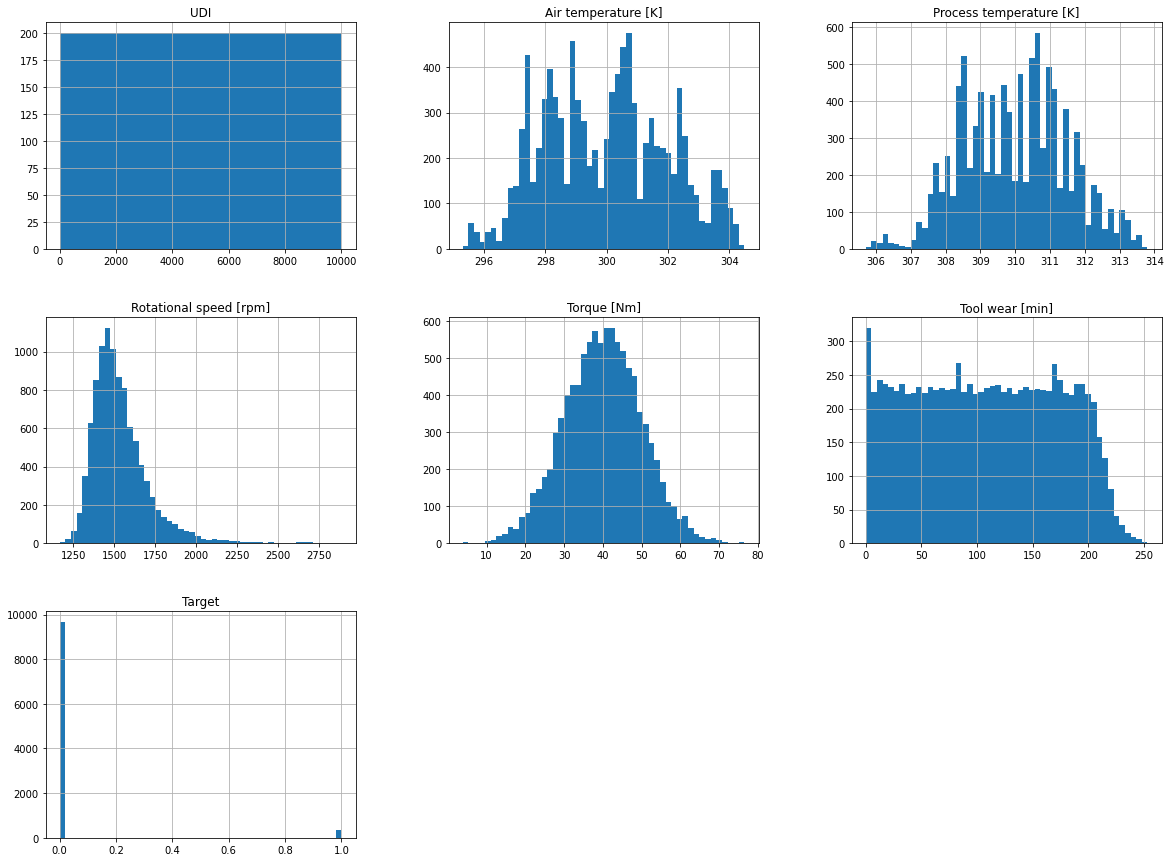

In [5]:
data.hist(bins = 50, figsize = (20, 15))

### Separate the data into features (x) and label (y).
- y1 is the outcome of whether or not the machine failed
- y2 is the type of failure that occurred on the machine
- x_total contains the attributes that contribute to the failure of the machines
- x_failures contains the attributes that contribute to the failure just from the machines that failed

In [6]:
attributes = ['Type',
             'Air temperature [K]',
             'Process temperature [K]',
             'Rotational speed [rpm]',
             'Torque [Nm]',
             'Tool wear [min]']
x_total = data[attributes]
x_failures = failures[attributes]
y1 = data['Target']
y2 = failures['Failure Type']

## Start with looking at just whether the machine failed or not.

### Split the data into train and test sets.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_total, y1, test_size=0.2, random_state=42)

### Visualize the quantities of all of the inputs in the dataset.

array([[<AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>],
       [<AxesSubplot:title={'center':'Tool wear [min]'}>, <AxesSubplot:>]],
      dtype=object)

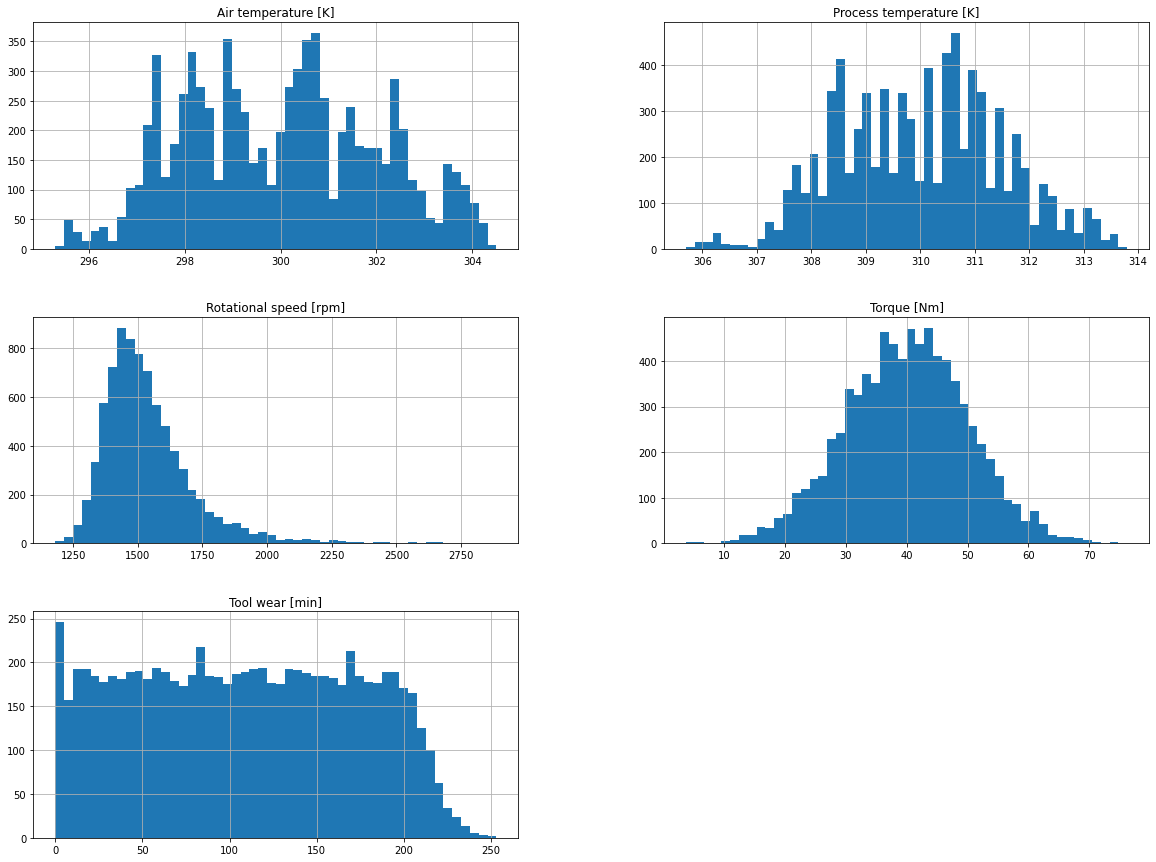

In [8]:
x_train.hist(bins = 50, figsize = (20, 15))

### Visualize the number of machines that failed vs. the number of machines that did not fail.

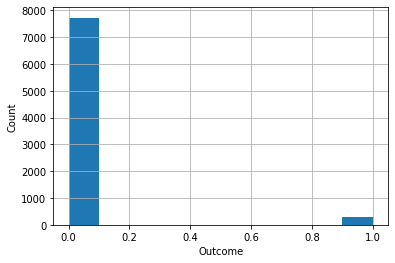

In [9]:
y_train.hist()
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

### Helper method for handling non-numerical data.

In [10]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [11]:
# Converting the type column from string to int
x_train = handle_non_numerical_data(x_train)
x_test = handle_non_numerical_data(x_test)
print(x_train.head())

      Type  Air temperature [K]  Process temperature [K]  \
9254     0                298.3                    309.1   
1561     0                298.2                    308.4   
1670     0                298.2                    307.8   
6087     2                300.9                    310.8   
6669     0                301.4                    310.5   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
9254                    1616         31.1              195  
1561                    1388         53.8              137  
1670                    1528         31.1              194  
6087                    1599         33.0                7  
6669                    1571         33.9              208  


### Scale the data.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

### Create a Correlation Matrix.

In [13]:
corr_matrix = pd.DataFrame(x_train_scaled).corr(method='pearson')
print(corr_matrix)
# Inverse relation between torque and rotational speed (Makes sense due to the power equation P = Tw)
# Direct correlation between air temperature and process temperature

          0         1         2         3         4         5
0  1.000000  0.003992 -0.002226  0.002320 -0.004858  0.001129
1  0.003992  1.000000  0.877716  0.022510 -0.011680 -0.000700
2 -0.002226  0.877716  1.000000  0.022138 -0.016142 -0.003354
3  0.002320  0.022510  0.022138  1.000000 -0.876246 -0.006597
4 -0.004858 -0.011680 -0.016142 -0.876246  1.000000  0.001060
5  0.001129 -0.000700 -0.003354 -0.006597  0.001060  1.000000


### Highest Correlations
- Process Temperature vs. Air Temperature
- Rotational Speed vs. Torque

### Plot Process Temperature vs. Air Temperature

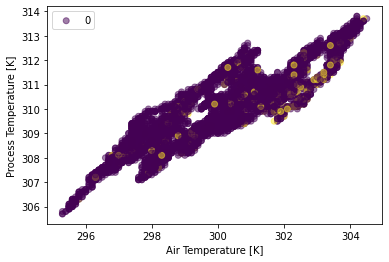

In [14]:
plt.scatter(x_train['Air temperature [K]'], x_train['Process temperature [K]'], c = y_train, alpha = 0.5)
plt.xlabel('Air Temperature [K]')
plt.ylabel('Process Temperature [K]')
plt.legend(labels = y_train)
plt.show()

### Plot Rotational Speed vs. Torque

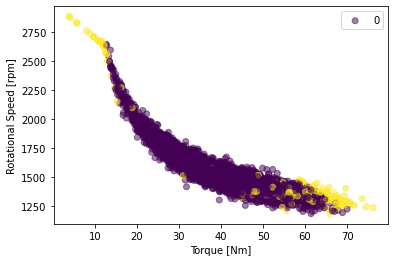

In [15]:
plt.scatter(x_train['Torque [Nm]'], x_train['Rotational speed [rpm]'], c = y_train, alpha = 0.5)
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational Speed [rpm]')
plt.legend(labels = y_train)
plt.show()

### Scatter Matrix Showing Correlation Between Attributes

array([[<AxesSubplot:xlabel='Type', ylabel='Type'>,
        <AxesSubplot:xlabel='Air temperature [K]', ylabel='Type'>,
        <AxesSubplot:xlabel='Process temperature [K]', ylabel='Type'>,
        <AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Type'>,
        <AxesSubplot:xlabel='Torque [Nm]', ylabel='Type'>,
        <AxesSubplot:xlabel='Tool wear [min]', ylabel='Type'>],
       [<AxesSubplot:xlabel='Type', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Air temperature [K]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Process temperature [K]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Torque [Nm]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Tool wear [min]', ylabel='Air temperature [K]'>],
       [<AxesSubplot:xlabel='Type', ylabel='Process temperature [K]'>,
        <AxesSubplot:xlabel='Air temperature [K]', ylabel='Process temper

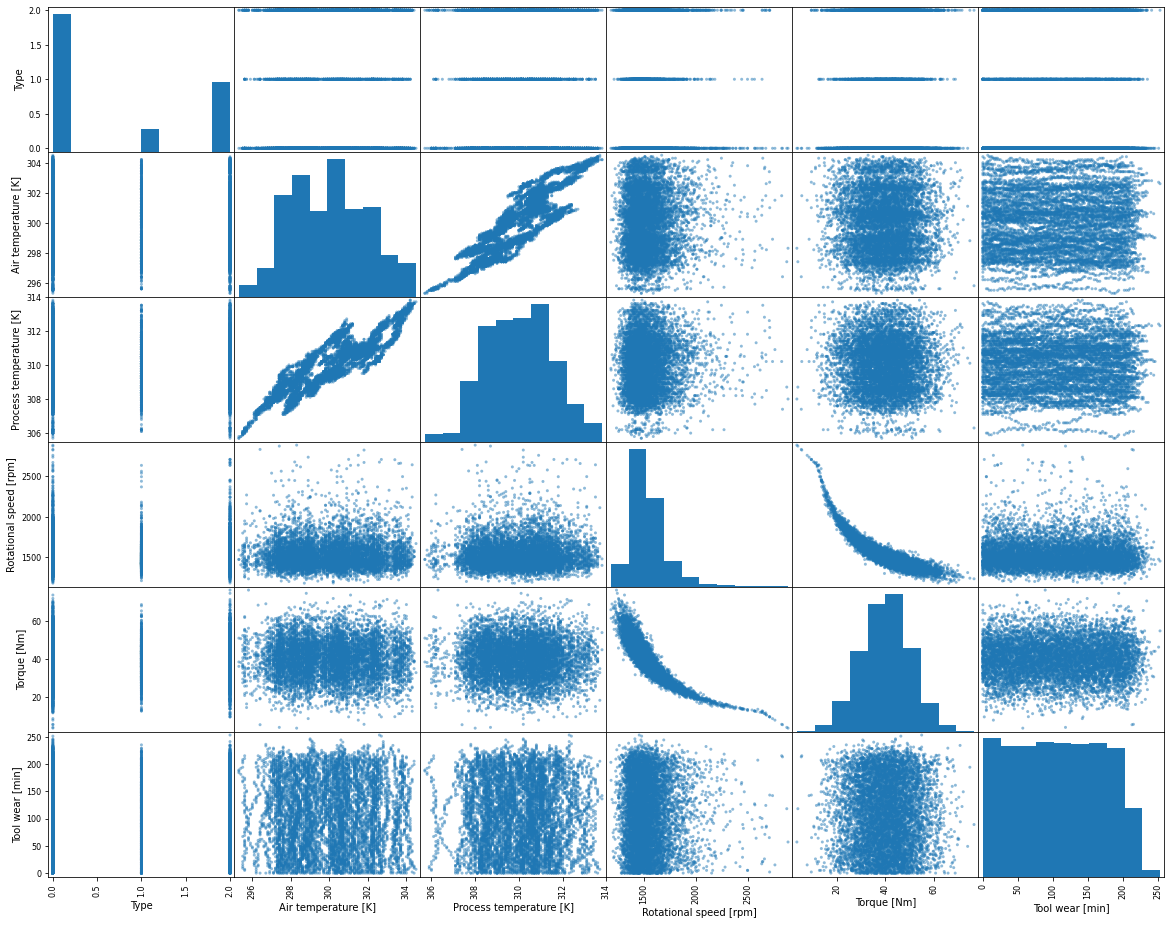

In [16]:
from pandas.plotting import scatter_matrix
scatter_matrix(x_train, figsize = (20, 16))

### Gaussian Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(x_train_scaled, y_train)

GaussianNB()

In [18]:
from sklearn import metrics
print(metrics.accuracy_score(y_train, clf_gnb.predict(x_train_scaled)))

0.958125


In [19]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(clf_gnb, x_train_scaled, y_train, cv = 3, scoring = "accuracy"))

[0.96025497 0.96062992 0.95536384]


In [20]:
from sklearn.model_selection import cross_val_predict
clf_gnb_pred = cross_val_predict(clf_gnb, x_train_scaled, y_train, cv = 3)

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, clf_gnb_pred))

[[7617  105]
 [ 225   53]]


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score:", precision_score(y_train, clf_gnb_pred))
print("Recall Score:", recall_score(y_train, clf_gnb_pred))
print("F1 Score:", f1_score(y_train, clf_gnb_pred))

Precision Score: 0.33544303797468356
Recall Score: 0.1906474820143885
F1 Score: 0.24311926605504586


In [23]:
y_gnb_score = cross_val_predict(clf_gnb, x_train_scaled, y_train, cv = 3, method = "predict_proba")

In [24]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_gnb_score[:,1]))

0.9009184260982822


### Decision Tree

In [25]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(random_state=42)
clf_tree.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
print(metrics.accuracy_score(y_train, clf_tree.predict(x_train_scaled)))

1.0


In [27]:
print(cross_val_score(clf_tree, x_train_scaled, y_train, cv = 3, scoring = "accuracy"))

[0.97975253 0.97937758 0.98087022]


In [28]:
clf_tree_pred = cross_val_predict(clf_tree, x_train_scaled, y_train,cv = 3)

In [29]:
print(confusion_matrix(y_train, clf_tree_pred))

[[7639   83]
 [  77  201]]


In [30]:
print("Precision Score:", precision_score(y_train, clf_tree_pred))
print("Recall Score:", recall_score(y_train, clf_tree_pred))
print("F1 Score:", f1_score(y_train, clf_tree_pred))

Precision Score: 0.7077464788732394
Recall Score: 0.7230215827338129
F1 Score: 0.7153024911032028


In [31]:
y_tree_score = cross_val_predict(clf_tree, x_train_scaled, y_train, cv = 3, method = "predict_proba")

In [32]:
print(roc_auc_score(y_train, y_tree_score[:,1]))

0.856136535992651


### KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [34]:
print(metrics.accuracy_score(y_train, clf_knn.predict(x_train_scaled)))

0.979625


In [35]:
print(cross_val_score(clf_knn, x_train_scaled, y_train, cv = 3, scoring = "accuracy"))

[0.9696288  0.97300337 0.97261815]


In [36]:
clf_knn_pred = cross_val_predict(clf_knn, x_train_scaled, y_train,cv = 3)

In [37]:
print(confusion_matrix(y_train, clf_knn_pred))

[[7705   17]
 [ 209   69]]


In [38]:
print("Precision Score:", precision_score(y_train, clf_knn_pred))
print("Recall Score:", recall_score(y_train, clf_knn_pred))
print("F1 Score:", f1_score(y_train, clf_knn_pred))

Precision Score: 0.8023255813953488
Recall Score: 0.24820143884892087
F1 Score: 0.37912087912087916


In [39]:
y_knn_score = cross_val_predict(clf_knn, x_train_scaled, y_train, cv = 3, method = "predict_proba")

In [40]:
print(roc_auc_score(y_train, y_knn_score[:,1]))

0.8357735722843637


### Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(random_state=42)
clf_log.fit(x_train_scaled, y_train)

LogisticRegression(random_state=42)

In [42]:
print(metrics.accuracy_score(y_train, clf_log.predict(x_train_scaled)))

0.969125


In [43]:
print(cross_val_score(clf_log, x_train_scaled, y_train, cv = 3, scoring = "accuracy"))

[0.97150356 0.96775403 0.96886722]


In [44]:
clf_log_pred = cross_val_predict(clf_log, x_train_scaled, y_train,cv = 3)

In [45]:
print(confusion_matrix(y_train, clf_log_pred))

[[7707   15]
 [ 230   48]]


In [46]:
print("Precision Score:", precision_score(y_train, clf_log_pred))
print("Recall Score:", recall_score(y_train, clf_log_pred))
print("F1 Score:", f1_score(y_train, clf_log_pred))

Precision Score: 0.7619047619047619
Recall Score: 0.17266187050359713
F1 Score: 0.28152492668621704


In [47]:
y_log_score = cross_val_predict(clf_log, x_train_scaled, y_train, cv = 3, method = "predict_proba")

In [48]:
print(roc_auc_score(y_train, y_log_score[:,1]))

0.8951193357668179


### Random Forests

In [49]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(x_train_scaled, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [50]:
print(metrics.accuracy_score(y_train, rnd_clf.predict(x_train_scaled)))

0.97625


In [51]:
print(cross_val_score(rnd_clf, x_train_scaled, y_train, cv = 3, scoring = "accuracy"))

[0.97450319 0.97412823 0.97374344]


In [52]:
clf_rnd_pred = cross_val_predict(rnd_clf, x_train_scaled, y_train,cv = 3)

In [53]:
print(confusion_matrix(y_train, clf_rnd_pred))

[[7714    8]
 [ 199   79]]


In [54]:
print("Precision Score:", precision_score(y_train, clf_rnd_pred))
print("Recall Score:", recall_score(y_train, clf_rnd_pred))
print("F1 Score:", f1_score(y_train, clf_rnd_pred))

Precision Score: 0.9080459770114943
Recall Score: 0.2841726618705036
F1 Score: 0.4328767123287671


In [55]:
y_rnd_score = cross_val_predict(rnd_clf, x_train_scaled, y_train, cv = 3, method = "predict_proba")

In [56]:
print(roc_auc_score(y_train, y_rnd_score[:,1]))

0.9670375587641774


### Fine-Tuning Using Ensemble

In [57]:
from sklearn.ensemble import VotingClassifier
clf1 = GaussianNB()
clf2 = tree.DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()
clf4 = LogisticRegression(random_state=42)

In [58]:
eclf1 = VotingClassifier(estimators=[('nb', clf1), ('tree', clf2), ('knn', clf3), ('lr', clf4)])

In [59]:
eclf1.fit(x_train_scaled, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('tree', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression(random_state=42))])

In [60]:
print(metrics.accuracy_score(y_train, eclf1.predict(x_train_scaled)))

0.972625


In [61]:
print(cross_val_score(eclf1, x_train_scaled, y_train, cv = 3, scoring = "accuracy"))

[0.9703787  0.97112861 0.96886722]


In [62]:
eclf1_pred = cross_val_predict(eclf1, x_train_scaled, y_train,cv = 3)

In [63]:
print(confusion_matrix(y_train, eclf1_pred))

[[7717    5]
 [ 234   44]]


In [64]:
print("Precision Score:", precision_score(y_train, eclf1_pred))
print("Recall Score:", recall_score(y_train, eclf1_pred))
print("F1 Score:", f1_score(y_train, eclf1_pred))

Precision Score: 0.8979591836734694
Recall Score: 0.15827338129496402
F1 Score: 0.2691131498470948


## Looking at the Different Types of Failure

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_failures, y2, test_size=0.2, random_state=42)

In [66]:
# Converting the type column from string to int
x_train = handle_non_numerical_data(x_train)
x_test = handle_non_numerical_data(x_test)
# y_train = handle_non_numerical_data(y_train)
# y_test = handle_non_numerical_data(y_test)

In [67]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)